In [1]:
import numpy as np
import pandas as pd 

In [2]:
data=pd.read_csv("D:/delivery_time.csv")

In [3]:
data

,Delivery,Sorting
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
data.head()

,Delivery,Sorting
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [5]:
data.tail()

,Delivery,Sorting
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7
20,21.50,5


In [6]:
data.isnull().sum()

Delivery    0
Sorting     0
dtype: int64

In [7]:
data.corr()

,Delivery,Sorting
Delivery,1.000000,0.825997
Sorting,0.825997,1.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Delivery  21 non-null     float64
 1   Sorting   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


In [9]:
data.describe()

,Delivery,Sorting
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [10]:
data.skew()

Delivery    0.352390
Sorting     0.047115
dtype: float64

In [11]:
data.kurtosis()

Delivery    0.317960
Sorting    -1.148455
dtype: float64

In [12]:
import matplotlib.pyplot as plt

<Axes: >

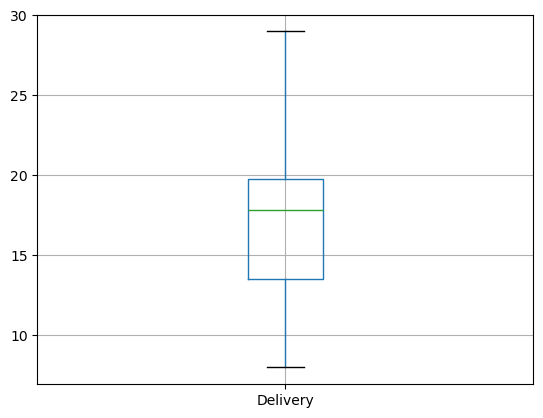

In [13]:
data.boxplot(['Delivery'])

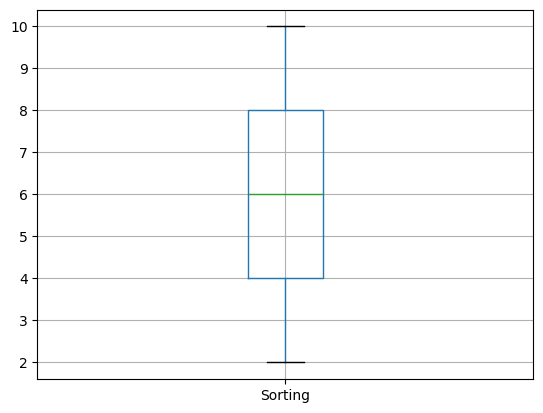

In [20]:
data.boxplot(['Sorting'])
plt.show()

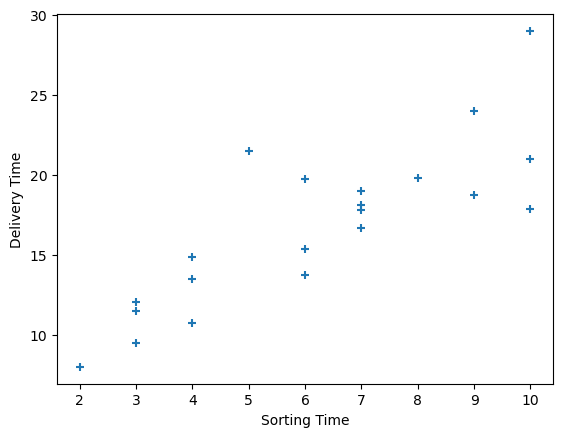

In [19]:
plt.scatter(data.Sorting,data.Delivery,marker='+')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

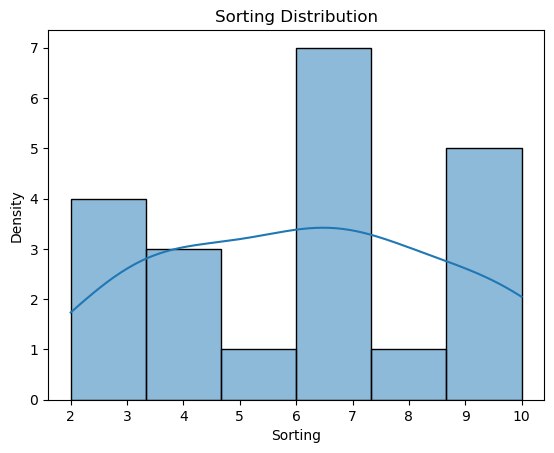

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data['Sorting'], kde=True)  # kde=True adds the smooth density curve
plt.xlabel('Sorting')
plt.ylabel('Density')
plt.title('Sorting Distribution')
plt.show()


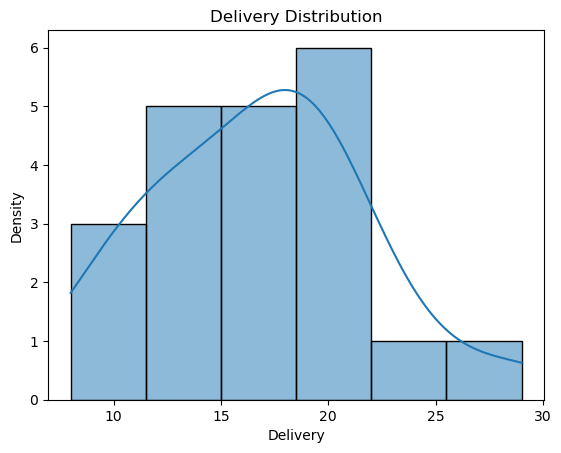

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data['Delivery'], kde=True)  # kde=True adds the density curve
plt.xlabel('Delivery')
plt.ylabel('Density')
plt.title('Delivery Distribution')
plt.show()


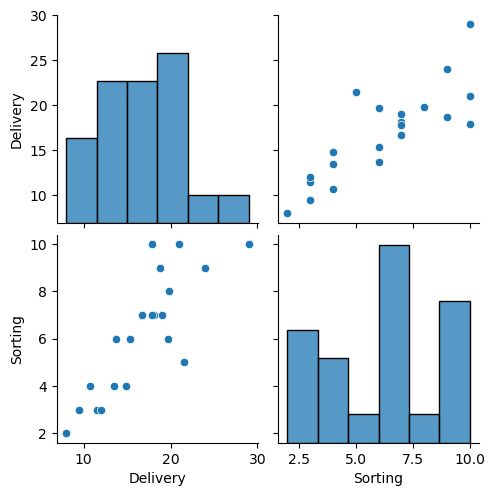

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data)
plt.show()


In [41]:
import statsmodels.formula.api as smf
model=smf.ols("Delivery~Sorting",data=data).fit()

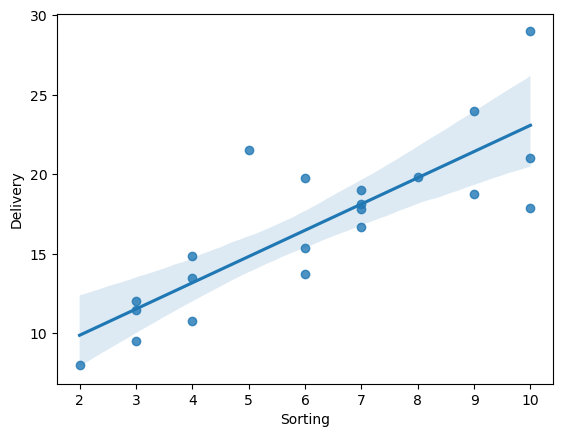

In [42]:
sns.regplot(x="Sorting",y="Delivery",data=data)
plt.show()

In [43]:
model.params

Intercept    6.582734
Sorting      1.649020
dtype: float64

In [44]:
print(model.tvalues, '\n', model.pvalues) 

Intercept    3.823349
Sorting      6.387447
dtype: float64 
 Intercept    0.001147
Sorting      0.000004
dtype: float64


In [45]:
rsqrt=(model.rsquared,model.rsquared_adj)
rsqrt

(0.6822714748417231, 0.6655489208860244)

In [46]:
newdata=pd.Series([1,11,5,13,15])

In [47]:
newdata

0     1
1    11
2     5
3    13
4    15
dtype: int64

In [48]:
data_pred=pd.DataFrame(newdata,columns=['Sorting'])

In [49]:
model.predict(data_pred)

0     8.231754
1    24.721953
2    14.827833
3    28.019993
4    31.318032
dtype: float64

In [50]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Delivery   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 26 Jul 2025   Prob (F-statistic):           3.98e-06
Time:                        13:18:28   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
Sorting        1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""